In [69]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [70]:
def parse_rating(rating: str) -> int:
    ratings = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
    return ratings[rating]

In [71]:
def parse_books_to_dict(html_books) -> dict:
    books_dict = {"Title": [],
            "Price": [],
            "Rating": []
            }

    for book in html_books:
        book_title = book.find("h3").find("a").get("title")
        book_price = float(book.find("p", class_="price_color").text[1:])
        book_stars_html = book.find("p", class_="star-rating")['class'][1]

        books_dict["Title"].append(book_title)
        books_dict["Price"].append(book_price)
        books_dict["Rating"].append(parse_rating(book_stars_html))

    return books_dict

In [72]:
url = "http://books.toscrape.com/"
response = requests.get(url).content
soup = BeautifulSoup(response, "html.parser")


In [73]:
books_html = soup.find_all("article", class_="product_pod")
print(len(books_html))

20


## Parsing _one_ book

In [74]:
type(books_html)

bs4.element.ResultSet

In [75]:
book_title = books_html[0].find("h3").find("a").get("title")
book_price = float(books_html[0].find("p", class_="price_color").text[1:])
book_stars_html = books_html[0].find("p", class_="star-rating").attrs['class'][1]

print(book_title)
print(book_price)
print(book_stars_html)

A Light in the Attic
51.77
Three


In [76]:
book_stars_html = parse_rating(book_stars_html)

## Parsing _all_ books

In [89]:
books_dict = parse_books_to_dict(books_html)
books_df = pd.DataFrame.from_dict(books_dict)
books_df

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1134, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 311, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2062, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2098, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [79]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/02-Data-Toolkit/02-Data-Sourcing/data-book_scraping/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 0.73s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed bo

In [86]:
MAX_PAGE = 50
result = []
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url).content
    soup = BeautifulSoup(response, "html.parser")
    books_html = soup.find_all("article", class_="product_pod")
    result.extend(books_html)

all_books = parse_books_to_dict(result)

In [95]:
all_books_df = pd.DataFrame.from_dict(all_books)
display(all_books_df.info())
all_books_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   60 non-null     object 
 1   Price   60 non-null     float64
 2   Rating  60 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


None

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1


<AxesSubplot:>

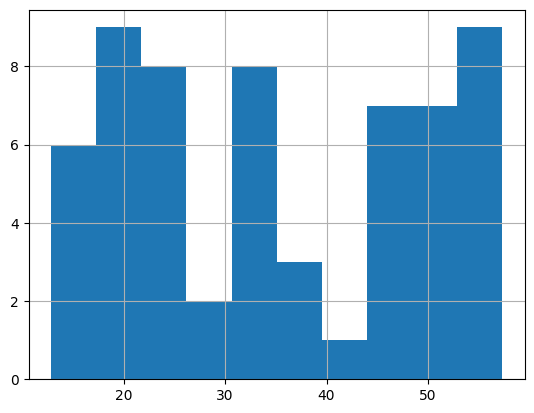

In [96]:
all_books_df["Price"].hist()

<AxesSubplot:xlabel='Rating'>

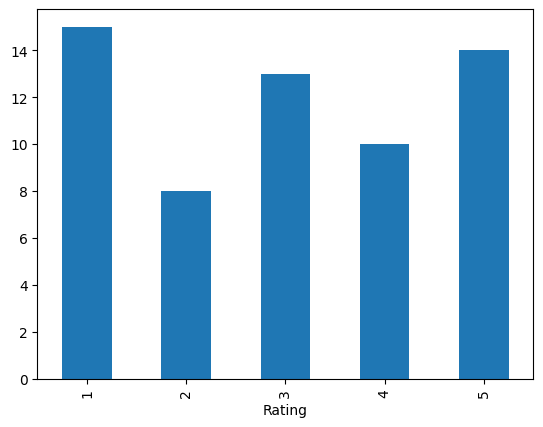

In [97]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [ ]:
all_books_df.to_csv("books.csv")